In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

In [2]:
import severability

In [3]:
G = nx.grid_2d_graph(5,5)
A = nx.to_numpy_array(G)
P = severability.transition_matrix(A)

In [4]:
np.sum(P,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
np.sum(P,axis=1)

array([0.66666667, 1.08333333, 0.91666667, 1.08333333, 0.66666667,
       1.08333333, 1.16666667, 1.08333333, 1.16666667, 1.08333333,
       0.91666667, 1.08333333, 1.        , 1.08333333, 0.91666667,
       1.08333333, 1.16666667, 1.08333333, 1.16666667, 1.08333333,
       0.66666667, 1.08333333, 0.91666667, 1.08333333, 0.66666667])

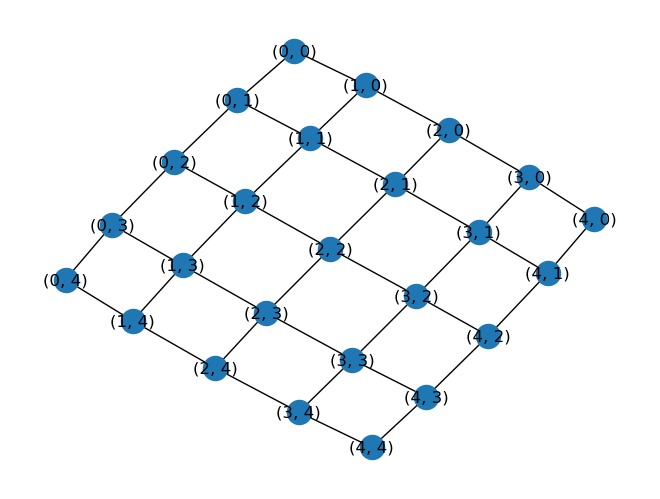

In [6]:
nx.draw(G,with_labels=True)

In [7]:
times = np.arange(1,100,1, dtype="int")
n_communities = np.zeros_like(times)
mean_s_communities = np.zeros_like(times)
max_s_communities = np.zeros_like(times)

for i in tqdm(range(len(times))):
    t = times[i]
    partition = severability.component_cover(P,t=t)
    n_communities[i] = len(partition)
    sizes = np.zeros(len(partition))
    for j in range((len(partition))):
        sizes[j] = len(partition[j][0])
    mean_s_communities[i] = sizes.mean()
    max_s_communities[i] = sizes.max()
    

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:04<00:00, 20.15it/s]


[Text(0.5, 0, 'time'), Text(0, 0.5, 'number communities')]

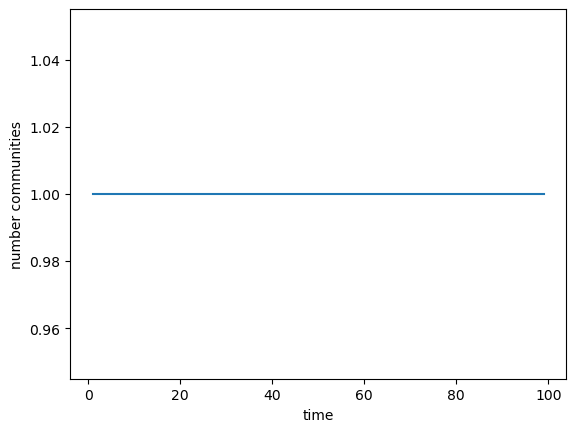

In [8]:
fig, ax = plt.subplots(1)
ax.plot(times,n_communities)
ax.set(xlabel="time", ylabel="number communities")

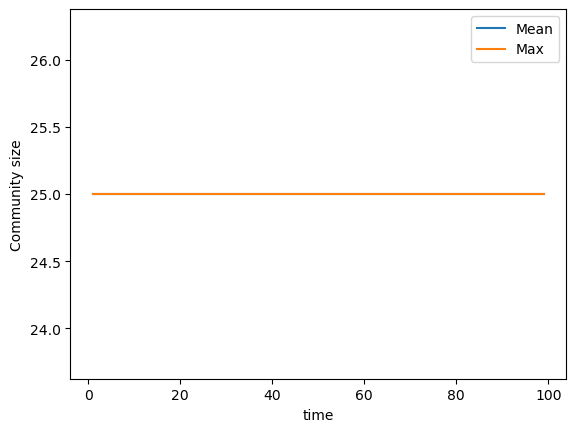

In [9]:
fig, ax = plt.subplots(1)
ax.plot(times,mean_s_communities,label="Mean")
ax.plot(times,max_s_communities,label="Max")
ax.set(xlabel="time", ylabel="Community size")
ax.legend()